# 1/ Standard Imports

In [1]:
import pandas as pd
import numpy as np
import os

# 2/ Installing pandas Profiling report from Pandas library
pip install pandas-profiling

from pandas_profiling import ProfileReport

In [2]:
import ydata_profiling

In [3]:
#import geopandas
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
#--Sklearn library--
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric

import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

# 3/ Loading the data set 

In [4]:
df = pd.read_excel('Alt04 -Adidas US Sales Datasets.xlsx',sheet_name='Data Sales Adidas')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


# 4/ First view of the dataset for cleaning

In [5]:
df.shape

(9648, 13)

- The data has 9648 rows and 13 columns.

In [6]:
df.describe(include='all')

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9.648000e+03,9648,9648,9648,9648,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648
unique,6,NaN,724,5,50,52,6,NaN,NaN,NaN,NaN,NaN,3
top,Foot Locker,NaN,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,NaN,NaN,NaN,NaN,NaN,Online
freq,2637,NaN,77,2448,432,360,1610,NaN,NaN,NaN,NaN,NaN,4889
first,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.173850e+06,NaN,NaN,NaN,NaN,NaN,45.216625,256.930037,93273.437500,34425.244761,0.422991,NaN
std,NaN,2.636038e+04,NaN,NaN,NaN,NaN,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197,NaN
min,NaN,1.128299e+06,NaN,NaN,NaN,NaN,NaN,7.000000,0.000000,0.000000,0.000000,0.100000,NaN
25%,NaN,1.185732e+06,NaN,NaN,NaN,NaN,NaN,35.000000,106.000000,4254.500000,1921.752500,0.350000,NaN


In [7]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


- The attributes are of different types (*int*, *float*, *object* and *date*) in the data.

In [9]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

- No null / missing data found in any attribute. 

# 5/ EDA through Profile Report

In [10]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

df.to_excel('1_StudentsScore_output.xlsx',sheet_name='Sheet1')

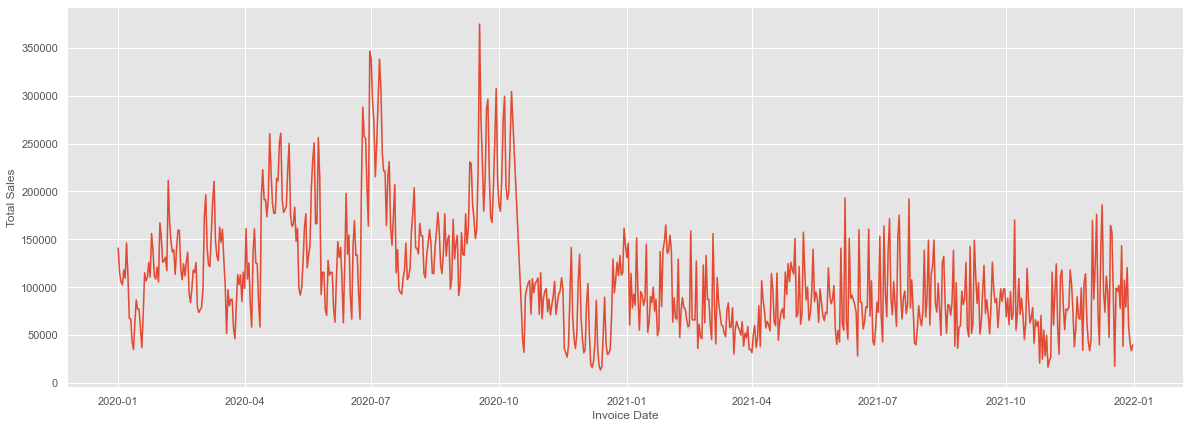

In [11]:
plt.figure(figsize = (20,7))
sns.lineplot(data = df, x = 'Invoice Date', y = 'Total Sales', ci = False)
plt.show()

- This shows the total transactions of 2020 were more than 2021 in the data set. 

In [12]:
# Unit Sold month trend
monthly_data = df.groupby(['Product', pd.Grouper(key='Invoice Date', freq='M')])['Units Sold'].sum().reset_index()

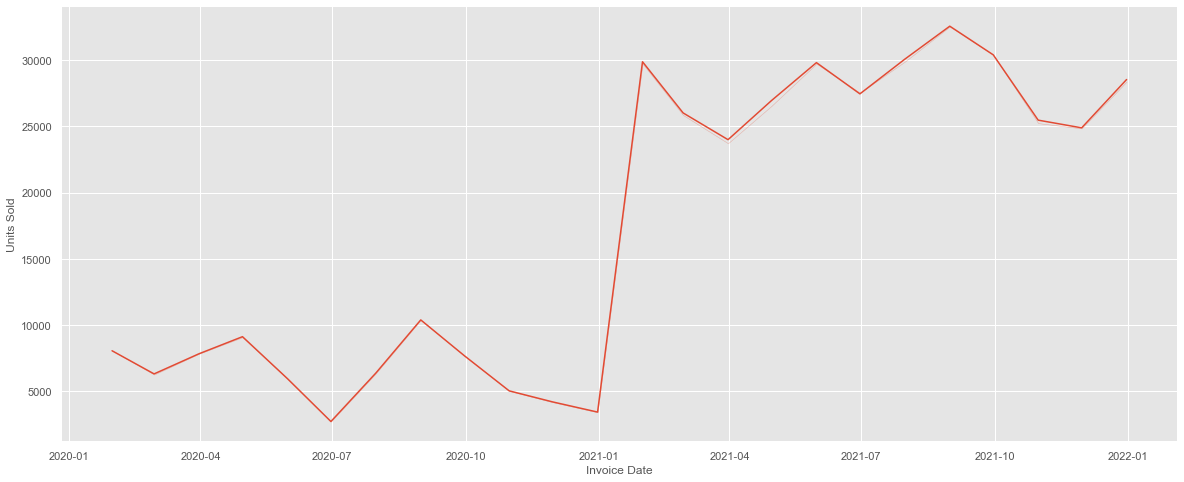

In [13]:
plt.figure(figsize = (20,8))
sns.lineplot(data = monthly_data, x = 'Invoice Date', y = 'Units Sold', ci = False)
plt.show()

- This shows the total Unit Sold trend were more in 2021 than 2020 in the data set.

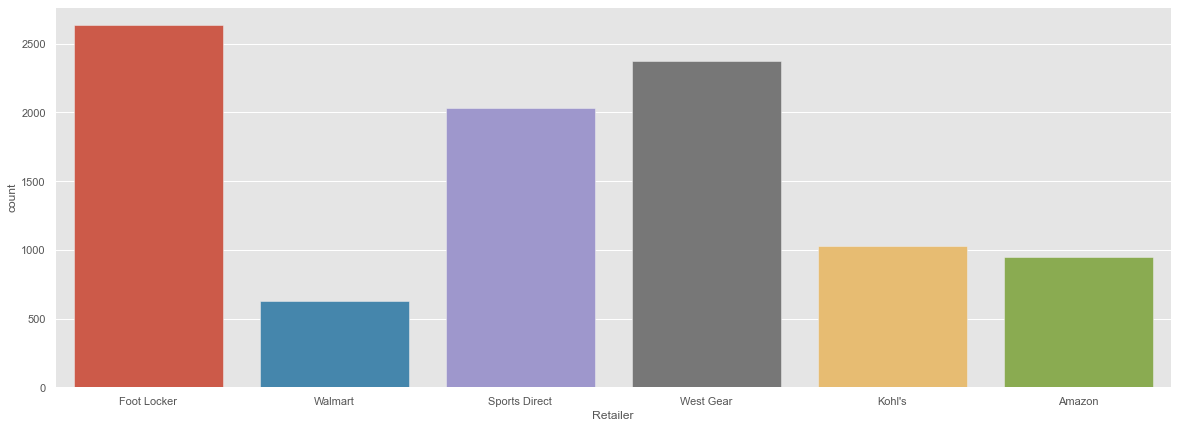

In [15]:
# EDA for Retailer 

plt.figure(figsize = (20,7))
sns.countplot(data=df, x='Retailer');

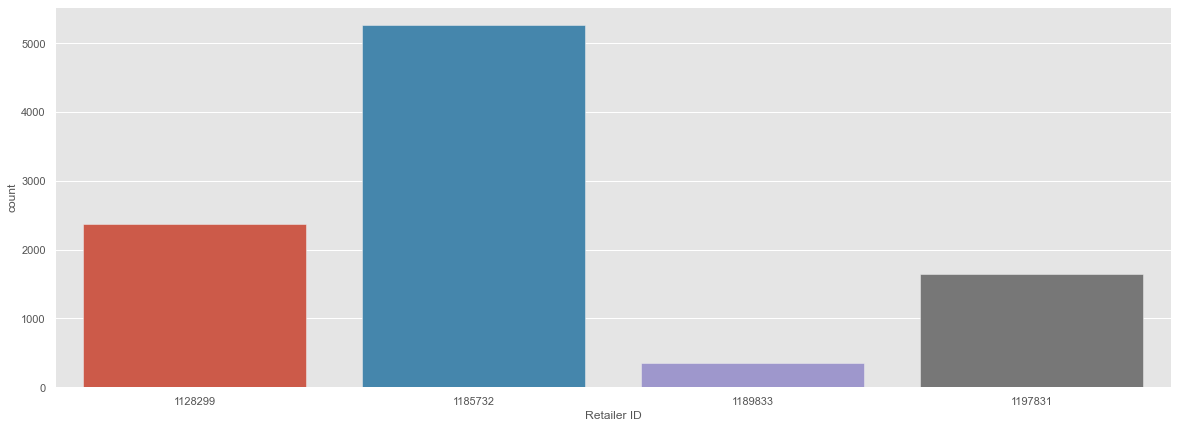

In [16]:
# Retailer ID
plt.figure(figsize = (20,7))
sns.countplot(data=df, x='Retailer ID');

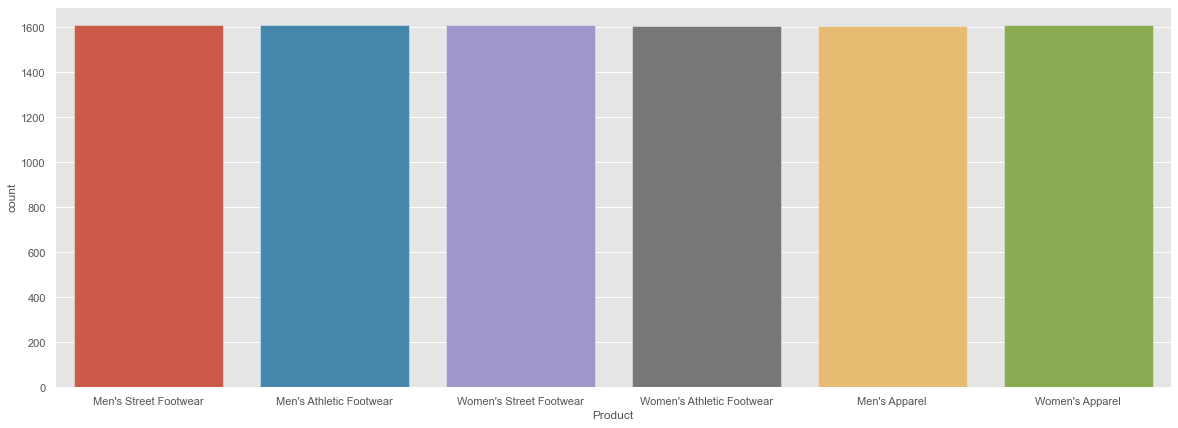

In [17]:
# Product 
plt.figure(figsize = (20,7))
sns.countplot(data=df, x='Product');

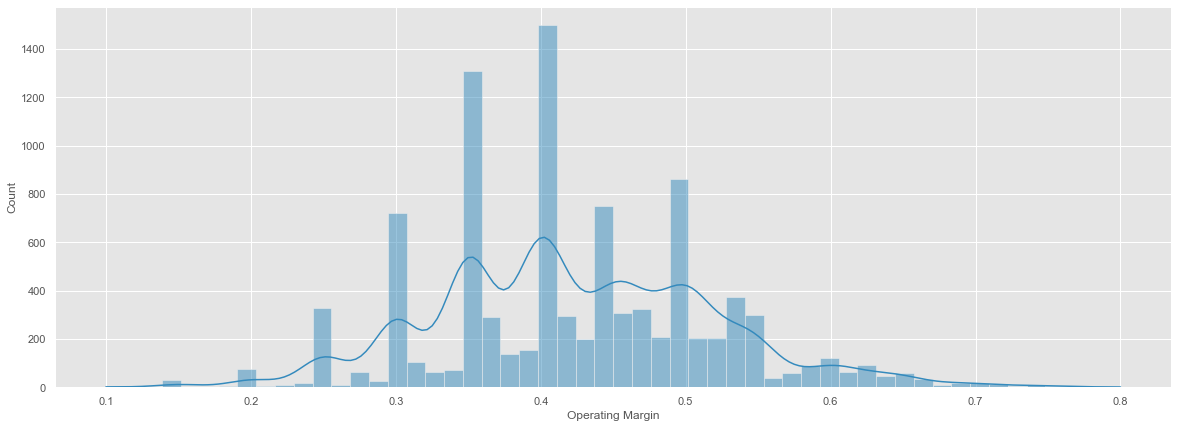

In [18]:
# Operating Margin
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Operating Margin', kde=True);

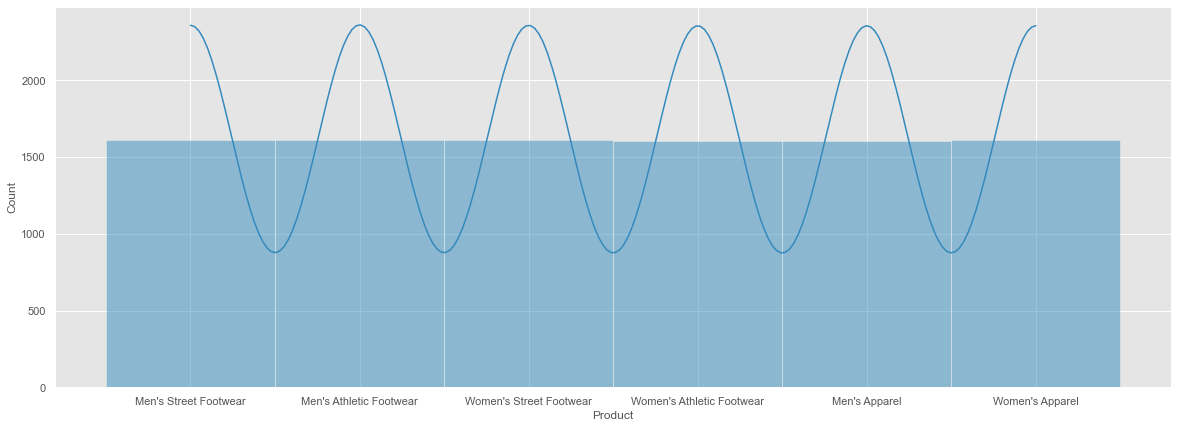

In [23]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Product', kde=True);

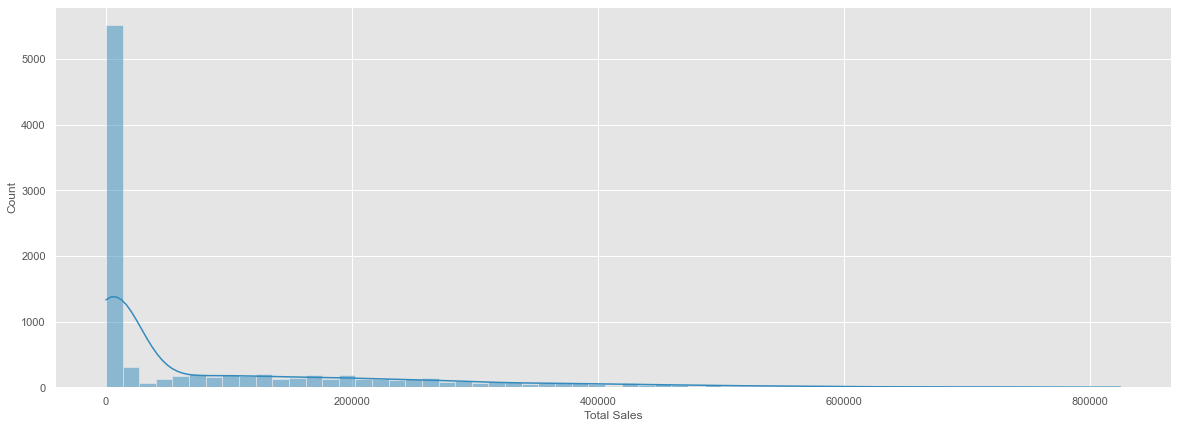

In [24]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Total Sales', kde=True);

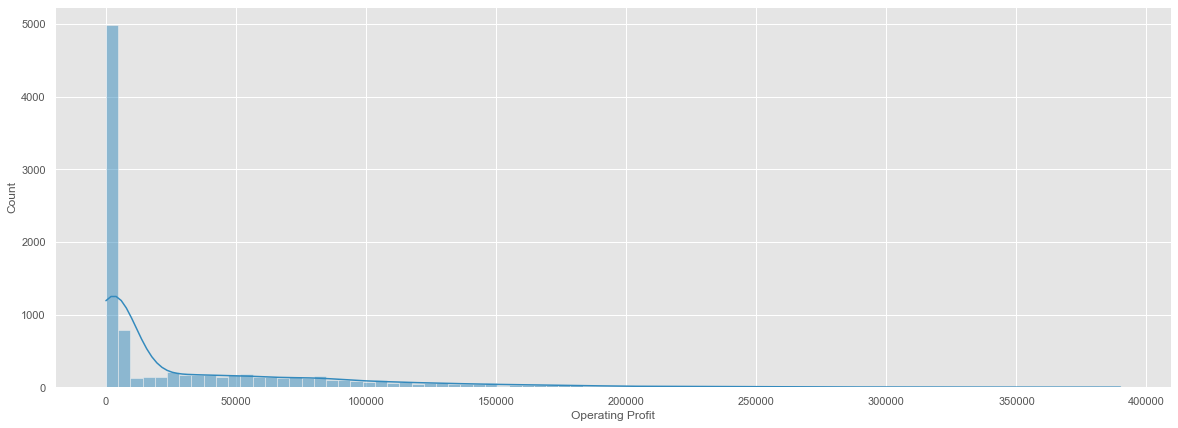

In [25]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Operating Profit', kde=True);

In [26]:
# Major Products
top_products= df[['Product','Total Sales']].groupby('Product').sum()
top_products

,Total Sales
Product,
Men's Apparel,123728632.0
Men's Athletic Footwear,153673680.0
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Women's Athletic Footwear,106631896.0
Women's Street Footwear,128002813.0


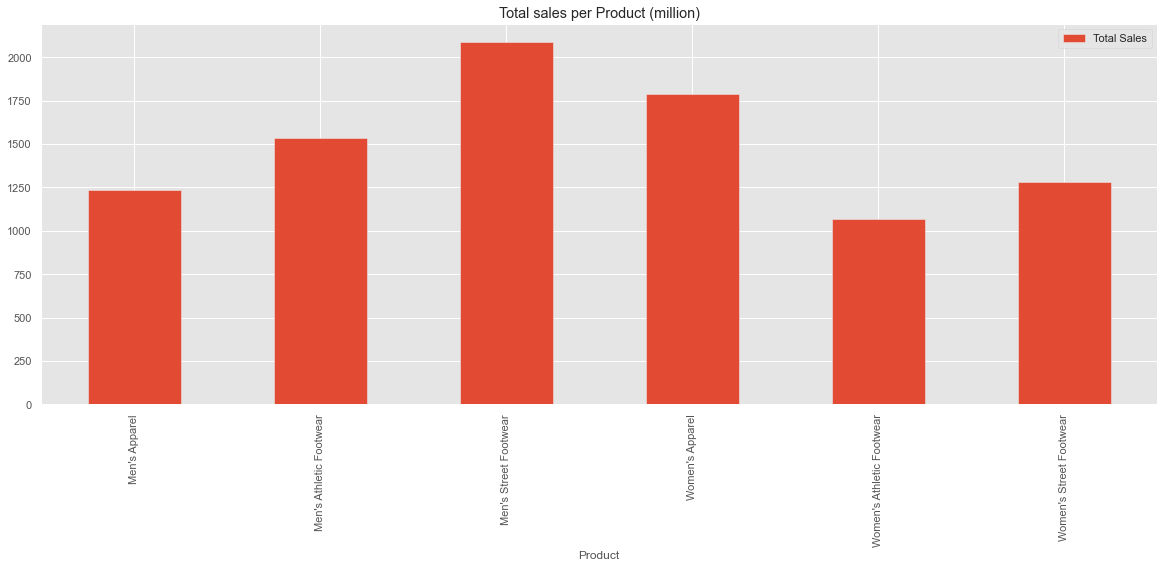

In [27]:
(top_products/100000).plot(kind='bar',figsize=(20,7),title='Total sales per Product (million)')
plt.show()

- Mens Street Footwear followed by Womens appearel are leading contributors in Total Sales and Womens Athletic footwear are lowest in contribution to Total sales

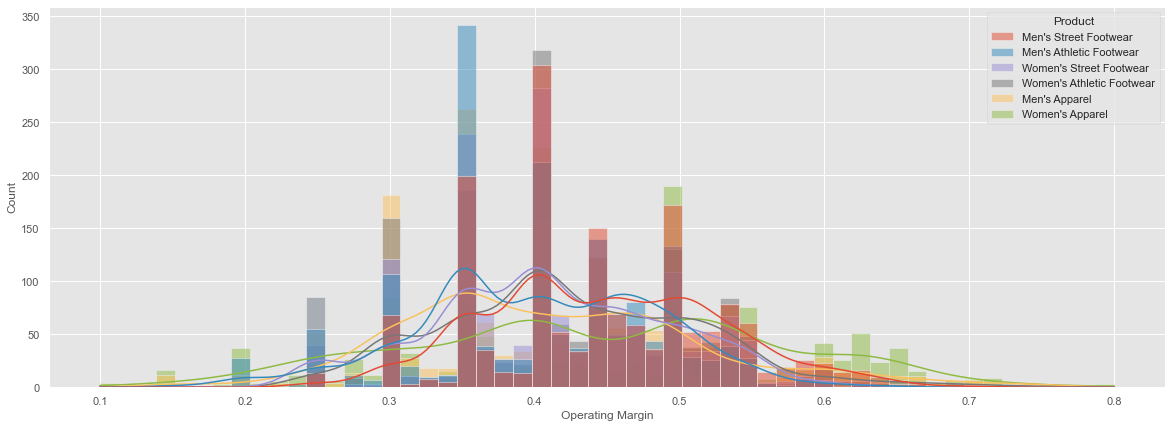

In [28]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Operating Margin', hue='Product', kde=True);

plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Product', hue='Operating Margin', kde=True);

TypeError: 'AxesSubplot' object is not callable

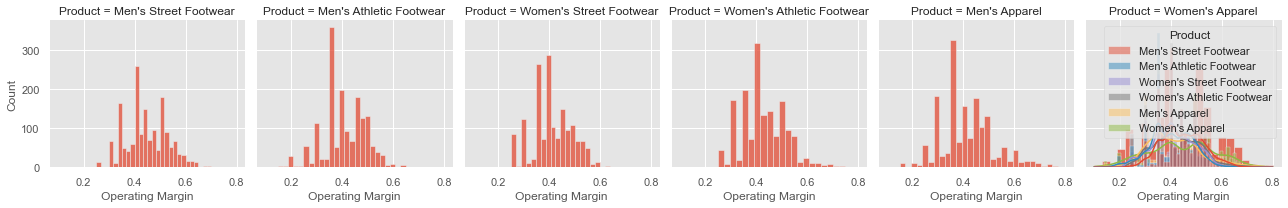

In [29]:
g = sns.FacetGrid(df, col="Product")
g.map(sns.histplot, "Operating Margin");
g.map(sns.histplot(data=df, x='Operating Margin', hue='Product', kde=True))

In [ ]:
plt.figure(figsize = (20,7))
sns.boxplot(data=df, x='Product', y='Units Sold') ;

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Product',kde = True);

In [ ]:
plt.figure(figsize = (20,7))
sns.boxplot(data=df, x='Region', y='Units Sold') ;

In [ ]:
plt.figure(figsize = (20,7))
sns.boxplot(data=df, x='Region', y='Units Sold') ;

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Region', hue='Sales Method', kde=True);

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Region', hue='Product', kde=True);

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, x='Retailer');

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, x='Retailer', hue='Product');

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, x='Retailer', hue='Sales Method');

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, x='Retailer', hue='Region');

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(data=df, x='Sales Method');

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='Retailer')
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='Operating Margin', kde=True);